<a href="https://colab.research.google.com/github/sudha21cs107/StudentPerformancePrediction/blob/main/Student_performance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [3]:
# Load data
df = pd.read_csv('/StudentsPerformanceTS.csv')
df.head(10)


,id,Name,Course_name,Hours_studied,Task_completed,Test_score,Weekend_Test_score,quiz_marks,Attendance score
0,1,Olivia Smith,Introduction to Computer Science,5 hours,85,78,82,85,95
1,2,Liam Johnson,Introduction to Computer Science,7 hours,92,85,75,70,92
2,3,Ava Williams,Introduction to Computer Science,4 hours,78,72,89,92,88
3,4,Noah Brown,Introduction to Computer Science,6 hours,89,90,68,65,96
4,5,Isabella Jones,Introduction to Computer Science,3 hours,95,82,94,78,90
5,6,Ethan Davis,Introduction to Computer Science,8 hours,82,95,79,88,94
6,7,Sophia Miller,Introduction to Computer Science,5.5 hours,90,69,85,73,89
7,8,Mason Wilson,Introduction to Computer Science,6.5 hours,75,88,72,90,93
8,9,Mia Moore,Introduction to Computer Science,4.5 hours,88,76,90,67,97
9,10,Lucas Taylor,Introduction to Computer Science,7.5 hours,93,92,63,82,91



Options:
1. Predict scores for a range of student IDs (Starting and Ending ID)
2. Predict scores for a specific student ID
3. Display the dataset
4. Display the whole performance prediction
5. Exit
Enter your choice (1, 2, 3, 4, or 5): 1
Enter the starting ID: 3
Enter the ending ID: 5

Choose a model for prediction:
1. Linear Regression
2. Decision Tree
3. Random Forest
Enter model choice (1, 2, or 3): 3


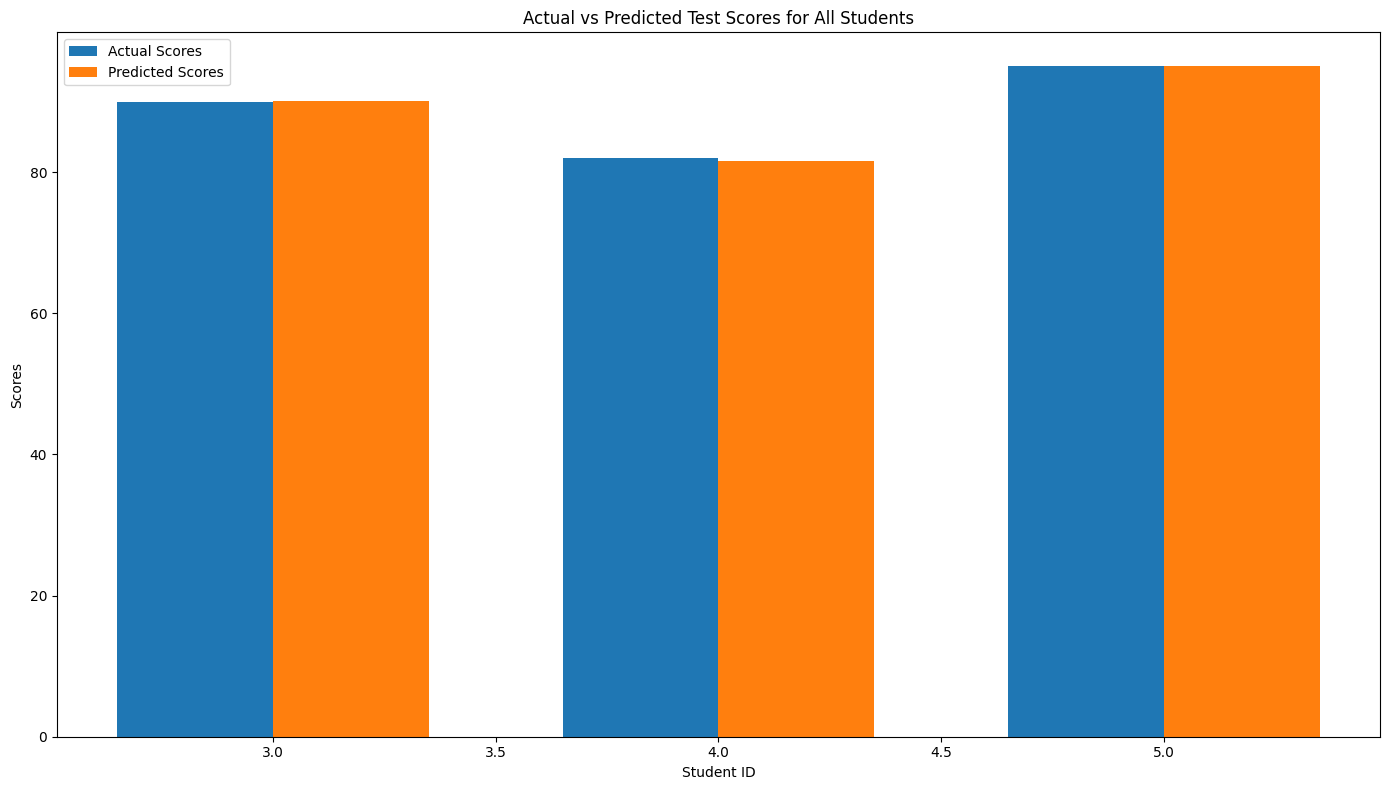

Mean Squared Error: 0.05
R2 Score: 1.00

Options:
1. Predict scores for a range of student IDs (Starting and Ending ID)
2. Predict scores for a specific student ID
3. Display the dataset
4. Display the whole performance prediction
5. Exit
Enter your choice (1, 2, 3, 4, or 5): 5
Exiting...


In [4]:
# Define features and target variable
X = df.drop(columns=['Attendance score'], axis=1)  # Replaced 'Weekend_Test_score' with 'Attendance_score'
y = df['Test_score']

# Preprocessing
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
X = preprocessor.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection and hyperparameter tuning
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

param_grid = {
    "Decision Tree": {
        "max_depth": [3, 5, 7]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 7]
    }
}

best_models = {}
for name, model in models.items():
    if name in param_grid:
        grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train)
        best_models[name] = model

def predict_scores(data, model):
    # Preprocess the data
    X_data = data.drop(columns=['Attendance score'], axis=1)  # Replaced 'Weekend_Test_score' with 'Attendance_score'
    y_data = data['Test_score']
    X_data = preprocessor.transform(X_data)

    # Predict scores
    y_pred = model.predict(X_data)

    # Calculate MSE and R2 Score
    mse = mean_squared_error(y_data, y_pred)
    r2 = r2_score(y_data, y_pred)

    # Plot bar chart for actual and predicted values
    plt.figure(figsize=(14, 8))
    student_ids = data.index  # Use student IDs as x-axis
    bar_width = 0.35
    plt.bar(student_ids - bar_width/2, y_data, bar_width, label='Actual Scores')
    plt.bar(student_ids + bar_width/2, y_pred, bar_width, label='Predicted Scores')
    plt.xlabel('Student ID')
    plt.ylabel('Scores')
    plt.title('Actual vs Predicted Test Scores for All Students')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print evaluation metrics
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")

while True:
    print("\nOptions:")
    print("1. Predict scores for a range of student IDs (Starting and Ending ID)")
    print("2. Predict scores for a specific student ID")
    print("3. Display the dataset")
    print("4. Display the whole performance prediction")
    print("5. Exit")

    option = input("Enter your choice (1, 2, 3, 4, or 5): ")

    if option == '1':
        start_id = int(input("Enter the starting ID: "))
        end_id = int(input("Enter the ending ID: "))
        selected_students = df[(df.index >= start_id) & (df.index <= end_id)]
        print("\nChoose a model for prediction:")
        for i, (name, model) in enumerate(best_models.items()):
            print(f"{i+1}. {name}")
        model_choice = int(input("Enter model choice (1, 2, or 3): "))
        selected_model = list(best_models.values())[model_choice - 1]
        predict_scores(selected_students, selected_model)
    elif option == '2':
        student_id = int(input("Enter the student ID: "))
        selected_student = df[df.index == student_id]
        print("\nChoose a model for prediction:")
        for i, (name, model) in enumerate(best_models.items()):
            print(f"{i+1}. {name}")
        model_choice = int(input("Enter model choice (1, 2, or 3): "))
        selected_model = list(best_models.values())[model_choice - 1]
        predict_scores(selected_student, selected_model)
    elif option == '3':
        print(df)
    elif option == '4':
        print("\nChoose a model for prediction:")
        for i, (name, model) in enumerate(best_models.items()):
            print(f"{i+1}. {name}")
        model_choice = int(input("Enter model choice (1, 2, or 3): "))
        selected_model = list(best_models.values())[model_choice - 1]
        predict_scores(df, selected_model)
    elif option == '5':
        print("Exiting...")
        break
    else:
        print("Invalid option. Please enter a valid option (1, 2, 3, 4, or 5).")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
